In [1]:
from PIL import Image
import gymnasium as gym
import warnings
warnings.filterwarnings('ignore')
import torch
import matplotlib.pyplot as plt

In [2]:
#env = gym.make('CartPole-v1', render_mode='rgb_array')
#env.reset()
#Image.fromarray(env.render()).show()


In [3]:
env = gym.make('CartPole-v0')#, render_mode='human')
state = env.reset()
#env.render()

state[0]

array([ 0.00218357, -0.03188436, -0.01352135, -0.0468205 ], dtype=float32)

In [4]:
n_state = env.observation_space.shape[0]
n_state

4

In [5]:
n_action = env.action_space.n
n_action

2

In [6]:
type(state[0])

numpy.ndarray

In [7]:
state = torch.from_numpy(env.reset()[0]).float()
state

tensor([-0.0270,  0.0084,  0.0469, -0.0032])

In [8]:
weight = torch.rand(n_state, n_action)
weight

tensor([[0.4790, 0.7592],
        [0.6808, 0.8343],
        [0.2043, 0.3064],
        [0.3662, 0.1588]])

In [9]:
state_max = torch.matmul(state, weight)# скалярное произведение
state_max

tensor([0.0011, 0.0003])

In [10]:
action = torch.argmax(state_max)
action.item()

0

In [11]:
def run_episode(env, weight, threshold = 1000):
    state = env.reset()[0]
    reward_sum = 0
    is_done = False
    is_break = False
    num_step = 0
    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))
        state, reward, is_done, is_break, info = env.step(action.item())
        reward_sum += reward
        
        num_step += 1
        if num_step > threshold:
            print('Много шагов {} - '.format(reward_sum))
            reward_sum = 0
            break

    return reward_sum, num_step

In [12]:

total_rewards = []
best_total_reward = 0
best_weight = None


for num in range(1000):
    weight = torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 10000)

    best_total_reward = reward_sum
    best_weight = weight

    print('Эпизод {}: {} - step {}'.format(num+1, reward_sum, count_step))
    if reward_sum > 0:
        total_rewards.append(reward_sum)




Эпизод 1: 10.0 - step 10
Эпизод 2: 22.0 - step 22
Эпизод 3: 200.0 - step 200
Эпизод 4: 12.0 - step 12
Эпизод 5: 126.0 - step 126
Эпизод 6: 60.0 - step 60
Эпизод 7: 74.0 - step 74
Эпизод 8: 10.0 - step 10
Эпизод 9: 9.0 - step 9
Эпизод 10: 112.0 - step 112
Эпизод 11: 9.0 - step 9
Эпизод 12: 78.0 - step 78
Эпизод 13: 126.0 - step 126
Эпизод 14: 40.0 - step 40
Эпизод 15: 9.0 - step 9
Эпизод 16: 37.0 - step 37
Эпизод 17: 9.0 - step 9
Эпизод 18: 9.0 - step 9
Эпизод 19: 33.0 - step 33
Эпизод 20: 116.0 - step 116
Эпизод 21: 27.0 - step 27
Эпизод 22: 10.0 - step 10
Эпизод 23: 128.0 - step 128
Эпизод 24: 34.0 - step 34
Эпизод 25: 9.0 - step 9
Эпизод 26: 9.0 - step 9
Эпизод 27: 10.0 - step 10
Эпизод 28: 200.0 - step 200
Эпизод 29: 10.0 - step 10
Эпизод 30: 8.0 - step 8
Эпизод 31: 9.0 - step 9
Эпизод 32: 75.0 - step 75
Эпизод 33: 68.0 - step 68
Эпизод 34: 10.0 - step 10
Эпизод 35: 10.0 - step 10
Эпизод 36: 10.0 - step 10
Эпизод 37: 10.0 - step 10
Эпизод 38: 9.0 - step 9
Эпизод 39: 176.0 - step 176

In [13]:

sum(total_rewards)/len(total_rewards)

46.674

In [14]:
best_total_reward

87.0

In [15]:
best_weight

tensor([[0.6199, 0.1995],
        [0.9016, 0.8062],
        [0.2548, 0.5707],
        [0.4379, 0.9978]])

In [16]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 166.0
Эпизод 2: 81.0
Эпизод 3: 85.0
Эпизод 4: 200.0
Эпизод 5: 137.0
Эпизод 6: 190.0
Эпизод 7: 75.0
Эпизод 8: 81.0
Эпизод 9: 179.0
Эпизод 10: 200.0
Эпизод 11: 200.0
Эпизод 12: 194.0
Эпизод 13: 200.0
Эпизод 14: 174.0
Эпизод 15: 200.0
Эпизод 16: 161.0
Эпизод 17: 200.0
Эпизод 18: 200.0
Эпизод 19: 85.0
Эпизод 20: 200.0
Эпизод 21: 99.0
Эпизод 22: 65.0
Эпизод 23: 200.0
Эпизод 24: 67.0
Эпизод 25: 200.0
Эпизод 26: 79.0
Эпизод 27: 79.0
Эпизод 28: 200.0
Эпизод 29: 200.0
Эпизод 30: 87.0
Эпизод 31: 71.0
Эпизод 32: 152.0
Эпизод 33: 73.0
Эпизод 34: 83.0
Эпизод 35: 200.0
Эпизод 36: 200.0
Эпизод 37: 200.0
Эпизод 38: 200.0
Эпизод 39: 87.0
Эпизод 40: 200.0
Эпизод 41: 61.0
Эпизод 42: 132.0
Эпизод 43: 76.0
Эпизод 44: 101.0
Эпизод 45: 167.0
Эпизод 46: 200.0
Эпизод 47: 200.0
Эпизод 48: 75.0
Эпизод 49: 174.0
Эпизод 50: 200.0
Эпизод 51: 130.0
Эпизод 52: 156.0
Эпизод 53: 158.0
Эпизод 54: 71.0
Эпизод 55: 71.0
Эпизод 56: 187.0
Эпизод 57: 71.0
Эпизод 58: 66.0
Эпизод 59: 200.0
Эпизод 60: 200.0
Эпизод 61: 

In [17]:
sum(total_rewards_eval)/len(total_rewards_eval)

142.25

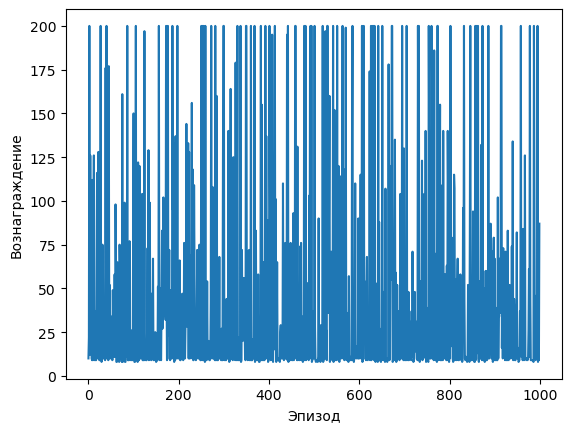

In [18]:

plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [19]:
total_rewards = []
best_total_reward = 0
best_weight = torch.rand(n_state, n_action).float()
noise_scale = 0.01

for num in range(1000):
    weight = best_weight + noise_scale * torch.rand(n_state, n_action).float()
    reward_sum, count_step = run_episode(env, weight, 202)
    if reward_sum > 0:
        if reward_sum >= best_total_reward:
            best_total_reward = reward_sum
            best_weight = weight
            noise_scale = max(noise_scale * 0.5, 0.0001)
            #noise_scale = max(noise_scale - 0.001, 0.0001)
        else:
            noise_scale = min(noise_scale * 2, 2)
            #noise_scale = min(noise_scale + 0.001, 2)
        total_rewards.append(reward_sum)
    else:
        noise_scale = max(noise_scale * 0.5, 0.0001)
        #noise_scale = max(noise_scale - 0.001, 0.0001)

    print('Эпизод {}: {} - step {} - noise {}'.format(num+1, reward_sum, count_step, noise_scale))


Эпизод 1: 31.0 - step 31 - noise 0.005
Эпизод 2: 21.0 - step 21 - noise 0.01
Эпизод 3: 49.0 - step 49 - noise 0.005
Эпизод 4: 31.0 - step 31 - noise 0.01
Эпизод 5: 26.0 - step 26 - noise 0.02
Эпизод 6: 35.0 - step 35 - noise 0.04
Эпизод 7: 24.0 - step 24 - noise 0.08
Эпизод 8: 21.0 - step 21 - noise 0.16
Эпизод 9: 26.0 - step 26 - noise 0.32
Эпизод 10: 26.0 - step 26 - noise 0.64
Эпизод 11: 11.0 - step 11 - noise 1.28
Эпизод 12: 31.0 - step 31 - noise 2
Эпизод 13: 34.0 - step 34 - noise 2
Эпизод 14: 9.0 - step 9 - noise 2
Эпизод 15: 8.0 - step 8 - noise 2
Эпизод 16: 39.0 - step 39 - noise 2
Эпизод 17: 200.0 - step 200 - noise 1.0
Эпизод 18: 72.0 - step 72 - noise 2.0
Эпизод 19: 200.0 - step 200 - noise 1.0
Эпизод 20: 200.0 - step 200 - noise 0.5
Эпизод 21: 104.0 - step 104 - noise 1.0
Эпизод 22: 90.0 - step 90 - noise 2.0
Эпизод 23: 151.0 - step 151 - noise 2
Эпизод 24: 84.0 - step 84 - noise 2
Эпизод 25: 83.0 - step 83 - noise 2
Эпизод 26: 200.0 - step 200 - noise 1.0
Эпизод 27: 99.0 

In [20]:
sum(total_rewards)/len(total_rewards)

187.915

In [21]:
best_weight

tensor([[30.4151, 31.0210],
        [31.2053, 31.1112],
        [29.0519, 33.0850],
        [27.5719, 33.3304]])

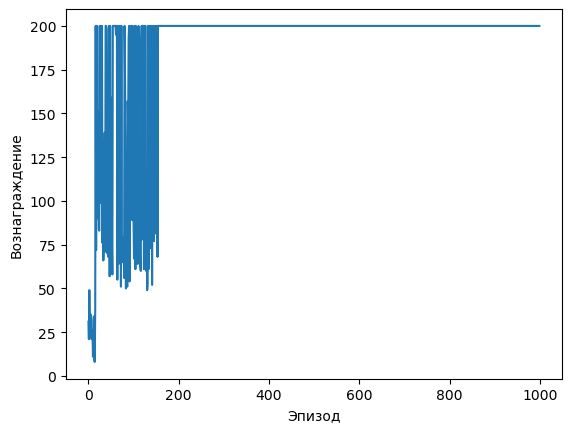

In [22]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [23]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 200.0
Эпизод 2: 200.0
Эпизод 3: 200.0
Эпизод 4: 200.0
Эпизод 5: 200.0
Эпизод 6: 200.0
Эпизод 7: 200.0
Эпизод 8: 200.0
Эпизод 9: 200.0
Эпизод 10: 200.0
Эпизод 11: 200.0
Эпизод 12: 200.0
Эпизод 13: 200.0
Эпизод 14: 200.0
Эпизод 15: 200.0
Эпизод 16: 200.0
Эпизод 17: 200.0
Эпизод 18: 200.0
Эпизод 19: 200.0
Эпизод 20: 200.0
Эпизод 21: 200.0
Эпизод 22: 200.0
Эпизод 23: 200.0
Эпизод 24: 200.0
Эпизод 25: 200.0
Эпизод 26: 200.0
Эпизод 27: 200.0
Эпизод 28: 200.0
Эпизод 29: 200.0
Эпизод 30: 200.0
Эпизод 31: 200.0
Эпизод 32: 200.0
Эпизод 33: 200.0
Эпизод 34: 200.0
Эпизод 35: 200.0
Эпизод 36: 200.0
Эпизод 37: 200.0
Эпизод 38: 200.0
Эпизод 39: 200.0
Эпизод 40: 200.0
Эпизод 41: 200.0
Эпизод 42: 200.0
Эпизод 43: 200.0
Эпизод 44: 200.0
Эпизод 45: 200.0
Эпизод 46: 200.0
Эпизод 47: 200.0
Эпизод 48: 200.0
Эпизод 49: 200.0
Эпизод 50: 200.0
Эпизод 51: 200.0
Эпизод 52: 200.0
Эпизод 53: 200.0
Эпизод 54: 200.0
Эпизод 55: 200.0
Эпизод 56: 200.0
Эпизод 57: 200.0
Эпизод 58: 200.0
Эпизод 59: 200.0
Эпизод

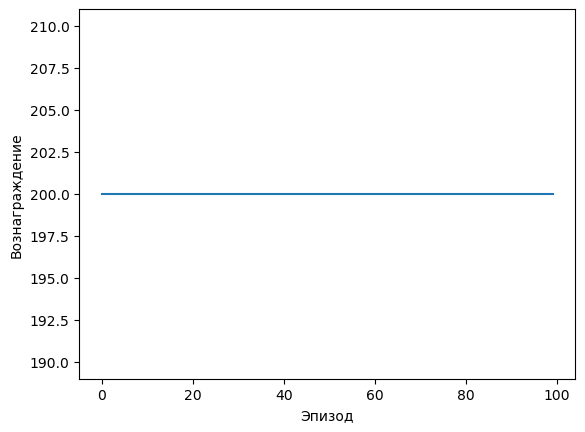

In [24]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [25]:
state = env.reset()[0]
state = torch.from_numpy(state).float()
print(state)
print(best_weight)
z = torch.matmul(state, best_weight)#вероятности действия
print("Z ",z)
probs = torch.nn.Softmax()(z)#производные вероятностей действия
print("Softmax(Z) ", probs)
action = int(torch.bernoulli(probs[1]).item())
print(action)
d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
print("d_softmax ", d_softmax)
d_log = d_softmax[action] / probs[action]
print(d_log)
grad = state.view(-1, 1) * d_log
print(grad)

tensor([-0.0357,  0.0340, -0.0176, -0.0028])
tensor([[30.4151, 31.0210],
        [31.2053, 31.1112],
        [29.0519, 33.0850],
        [27.5719, 33.3304]])
Z  tensor([-0.6140, -0.7262])
Softmax(Z)  tensor([0.5280, 0.4720])
0
d_softmax  tensor([[ 0.2492, -0.2492],
        [-0.2492,  0.2492]])
tensor([ 0.4720, -0.4720])
tensor([[-0.0168,  0.0168],
        [ 0.0160, -0.0160],
        [-0.0083,  0.0083],
        [-0.0013,  0.0013]])


In [26]:
def run_episode_strategy(env, weight):
    state = env.reset()[0]
    grads = []
    reward_sum = 0
    is_done = False
    is_break = False

    while not is_done and not is_break:
        state = torch.from_numpy(state).float()
        z = torch.matmul(state, weight)#вероятности действия
        probs = torch.nn.Softmax()(z)#производные вероятностей действия
        action = int(torch.bernoulli(probs[1]).item())

        d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
        d_log = d_softmax[action] / probs[action]

        grad = state.view(-1, 1) * d_log
        grads.append(grad)

        state, reward, is_done, is_break, _ = env.step(action)
        reward_sum += reward
        
    
    return reward_sum, grads

In [27]:
total_rewards = []
weight = torch.rand(n_state, n_action).float()
learning_rate = 0.001

for num in range(1000):
    reward_sum, grads = run_episode_strategy(env, weight)
    print('Эпизод {}: {} '.format(num+1, reward_sum))
    for i, grad in enumerate(grads):
        weight += learning_rate * grad * (reward_sum - i)
    
    total_rewards.append(reward_sum)




Эпизод 1: 37.0 
Эпизод 2: 27.0 
Эпизод 3: 16.0 
Эпизод 4: 15.0 
Эпизод 5: 17.0 
Эпизод 6: 54.0 
Эпизод 7: 22.0 
Эпизод 8: 24.0 
Эпизод 9: 22.0 
Эпизод 10: 47.0 
Эпизод 11: 12.0 
Эпизод 12: 63.0 
Эпизод 13: 29.0 
Эпизод 14: 39.0 
Эпизод 15: 36.0 
Эпизод 16: 58.0 
Эпизод 17: 46.0 
Эпизод 18: 20.0 
Эпизод 19: 73.0 
Эпизод 20: 31.0 
Эпизод 21: 30.0 
Эпизод 22: 33.0 
Эпизод 23: 56.0 
Эпизод 24: 70.0 
Эпизод 25: 22.0 
Эпизод 26: 30.0 
Эпизод 27: 80.0 
Эпизод 28: 69.0 
Эпизод 29: 45.0 
Эпизод 30: 23.0 
Эпизод 31: 94.0 
Эпизод 32: 50.0 
Эпизод 33: 61.0 
Эпизод 34: 177.0 
Эпизод 35: 45.0 
Эпизод 36: 21.0 
Эпизод 37: 62.0 
Эпизод 38: 57.0 
Эпизод 39: 20.0 
Эпизод 40: 55.0 
Эпизод 41: 50.0 
Эпизод 42: 25.0 
Эпизод 43: 29.0 
Эпизод 44: 42.0 
Эпизод 45: 36.0 
Эпизод 46: 55.0 
Эпизод 47: 44.0 
Эпизод 48: 113.0 
Эпизод 49: 59.0 
Эпизод 50: 60.0 
Эпизод 51: 50.0 
Эпизод 52: 120.0 
Эпизод 53: 188.0 
Эпизод 54: 100.0 
Эпизод 55: 103.0 
Эпизод 56: 67.0 
Эпизод 57: 45.0 
Эпизод 58: 93.0 
Эпизод 59: 82.0 


In [28]:
weight

tensor([[-0.5856,  1.5026],
        [-1.9044,  3.3949],
        [-2.5192,  3.2353],
        [-6.8684,  7.7737]])

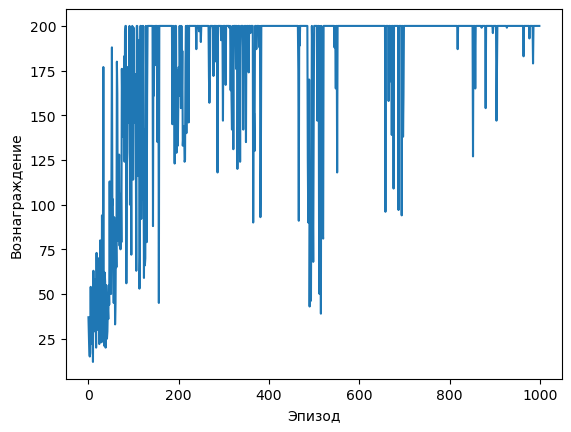

In [29]:
plt.plot(total_rewards)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()

In [30]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward, count_step = run_episode(env, best_weight)
    print('Эпизод {}: {}'.format(episode+1, total_reward))
    if total_reward > 0:
        total_rewards_eval.append(total_reward)

Эпизод 1: 200.0
Эпизод 2: 200.0
Эпизод 3: 200.0
Эпизод 4: 200.0
Эпизод 5: 200.0
Эпизод 6: 200.0
Эпизод 7: 200.0
Эпизод 8: 200.0
Эпизод 9: 200.0
Эпизод 10: 200.0
Эпизод 11: 200.0
Эпизод 12: 200.0
Эпизод 13: 200.0
Эпизод 14: 200.0
Эпизод 15: 200.0
Эпизод 16: 200.0
Эпизод 17: 200.0
Эпизод 18: 200.0
Эпизод 19: 200.0
Эпизод 20: 200.0
Эпизод 21: 200.0
Эпизод 22: 200.0
Эпизод 23: 200.0
Эпизод 24: 200.0
Эпизод 25: 200.0
Эпизод 26: 200.0
Эпизод 27: 200.0
Эпизод 28: 200.0
Эпизод 29: 200.0
Эпизод 30: 200.0
Эпизод 31: 200.0
Эпизод 32: 200.0
Эпизод 33: 200.0
Эпизод 34: 200.0
Эпизод 35: 200.0
Эпизод 36: 200.0
Эпизод 37: 200.0
Эпизод 38: 200.0
Эпизод 39: 200.0
Эпизод 40: 200.0
Эпизод 41: 200.0
Эпизод 42: 200.0
Эпизод 43: 200.0
Эпизод 44: 200.0
Эпизод 45: 200.0
Эпизод 46: 200.0
Эпизод 47: 200.0
Эпизод 48: 200.0
Эпизод 49: 200.0
Эпизод 50: 200.0
Эпизод 51: 200.0
Эпизод 52: 200.0
Эпизод 53: 200.0
Эпизод 54: 200.0
Эпизод 55: 200.0
Эпизод 56: 200.0
Эпизод 57: 200.0
Эпизод 58: 200.0
Эпизод 59: 200.0
Эпизод

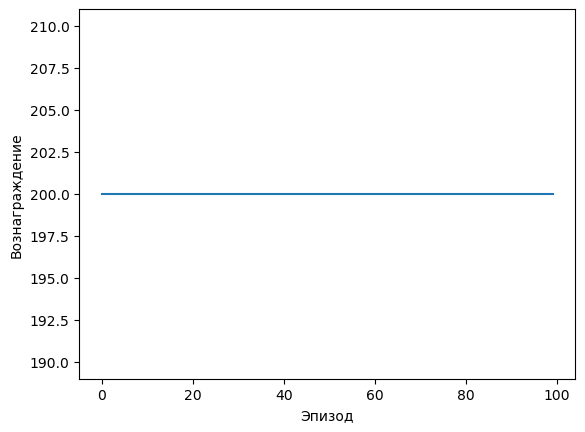

In [31]:
plt.plot(total_rewards_eval)
plt.xlabel('Эпизод')
plt.ylabel('Вознаграждение')
plt.show()